# COVID-19 Symptoms Checker

We will be working on the dataset from Kaggle: [COVID-19 Symptoms Checker](https://www.kaggle.com/iamhungundji/covid19-symptoms-checker)

## Description 

The dataset includes seven major symptoms that will be having an impact on whether someone has coronavirus disease or not.

## Research Question 

Segment the condition for medical advice.

## Import Library

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans,DBSCAN
from sklearn.mixture import GaussianMixture
import umap
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [4]:
df = pd.read_csv('/Users/chunyuzhang/Desktop/Kaggle/COVID-19_Symptoms_Checker-Cleaned-Data.csv')

In [3]:
df.head()

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Country
0,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,0,1,China
1,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,1,0,China
2,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,1,0,0,China
3,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,0,1,China
4,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,1,0,China


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316800 entries, 0 to 316799
Data columns (total 27 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Fever                    316800 non-null  int64 
 1   Tiredness                316800 non-null  int64 
 2   Dry-Cough                316800 non-null  int64 
 3   Difficulty-in-Breathing  316800 non-null  int64 
 4   Sore-Throat              316800 non-null  int64 
 5   None_Sympton             316800 non-null  int64 
 6   Pains                    316800 non-null  int64 
 7   Nasal-Congestion         316800 non-null  int64 
 8   Runny-Nose               316800 non-null  int64 
 9   Diarrhea                 316800 non-null  int64 
 10  None_Experiencing        316800 non-null  int64 
 11  Age_0-9                  316800 non-null  int64 
 12  Age_10-19                316800 non-null  int64 
 13  Age_20-24                316800 non-null  int64 
 14  Age_25-59           

Since coronavirus attack human indiscriminatly, wo wont need country as a feature of our model, Let's remove it.

In [5]:
df.drop(['Country'],axis=1,inplace=True)
df.head()

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Female,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes
0,1,1,1,1,1,0,1,1,1,1,...,0,1,0,1,0,0,0,0,0,1
1,1,1,1,1,1,0,1,1,1,1,...,0,1,0,1,0,0,0,0,1,0
2,1,1,1,1,1,0,1,1,1,1,...,0,1,0,1,0,0,0,1,0,0
3,1,1,1,1,1,0,1,1,1,1,...,0,1,0,0,1,0,0,0,0,1
4,1,1,1,1,1,0,1,1,1,1,...,0,1,0,0,1,0,0,0,1,0


In [6]:
df.isnull().sum()

Fever                      0
Tiredness                  0
Dry-Cough                  0
Difficulty-in-Breathing    0
Sore-Throat                0
None_Sympton               0
Pains                      0
Nasal-Congestion           0
Runny-Nose                 0
Diarrhea                   0
None_Experiencing          0
Age_0-9                    0
Age_10-19                  0
Age_20-24                  0
Age_25-59                  0
Age_60+                    0
Gender_Female              0
Gender_Male                0
Gender_Transgender         0
Severity_Mild              0
Severity_Moderate          0
Severity_None              0
Severity_Severe            0
Contact_Dont-Know          0
Contact_No                 0
Contact_Yes                0
dtype: int64

Our dataset doesnt have missing value

In [7]:
#understand the dataset 

df.describe()

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Female,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes
count,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,...,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000
mean,0.312500,0.500000,0.562500,0.500000,0.312500,0.062500,0.363636,0.545455,0.545455,0.363636,...,0.333333,0.333333,0.333333,0.250000,0.250000,0.250000,0.250000,0.333333,0.333333,0.333333
std,0.463513,0.500001,0.496079,0.500001,0.463513,0.242062,0.481046,0.497930,0.497930,0.481046,...,0.471405,0.471405,0.471405,0.433013,0.433013,0.433013,0.433013,0.471405,0.471405,0.471405
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.500000,1.000000,0.500000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,0.250000,0.250000,0.250000,0.250000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


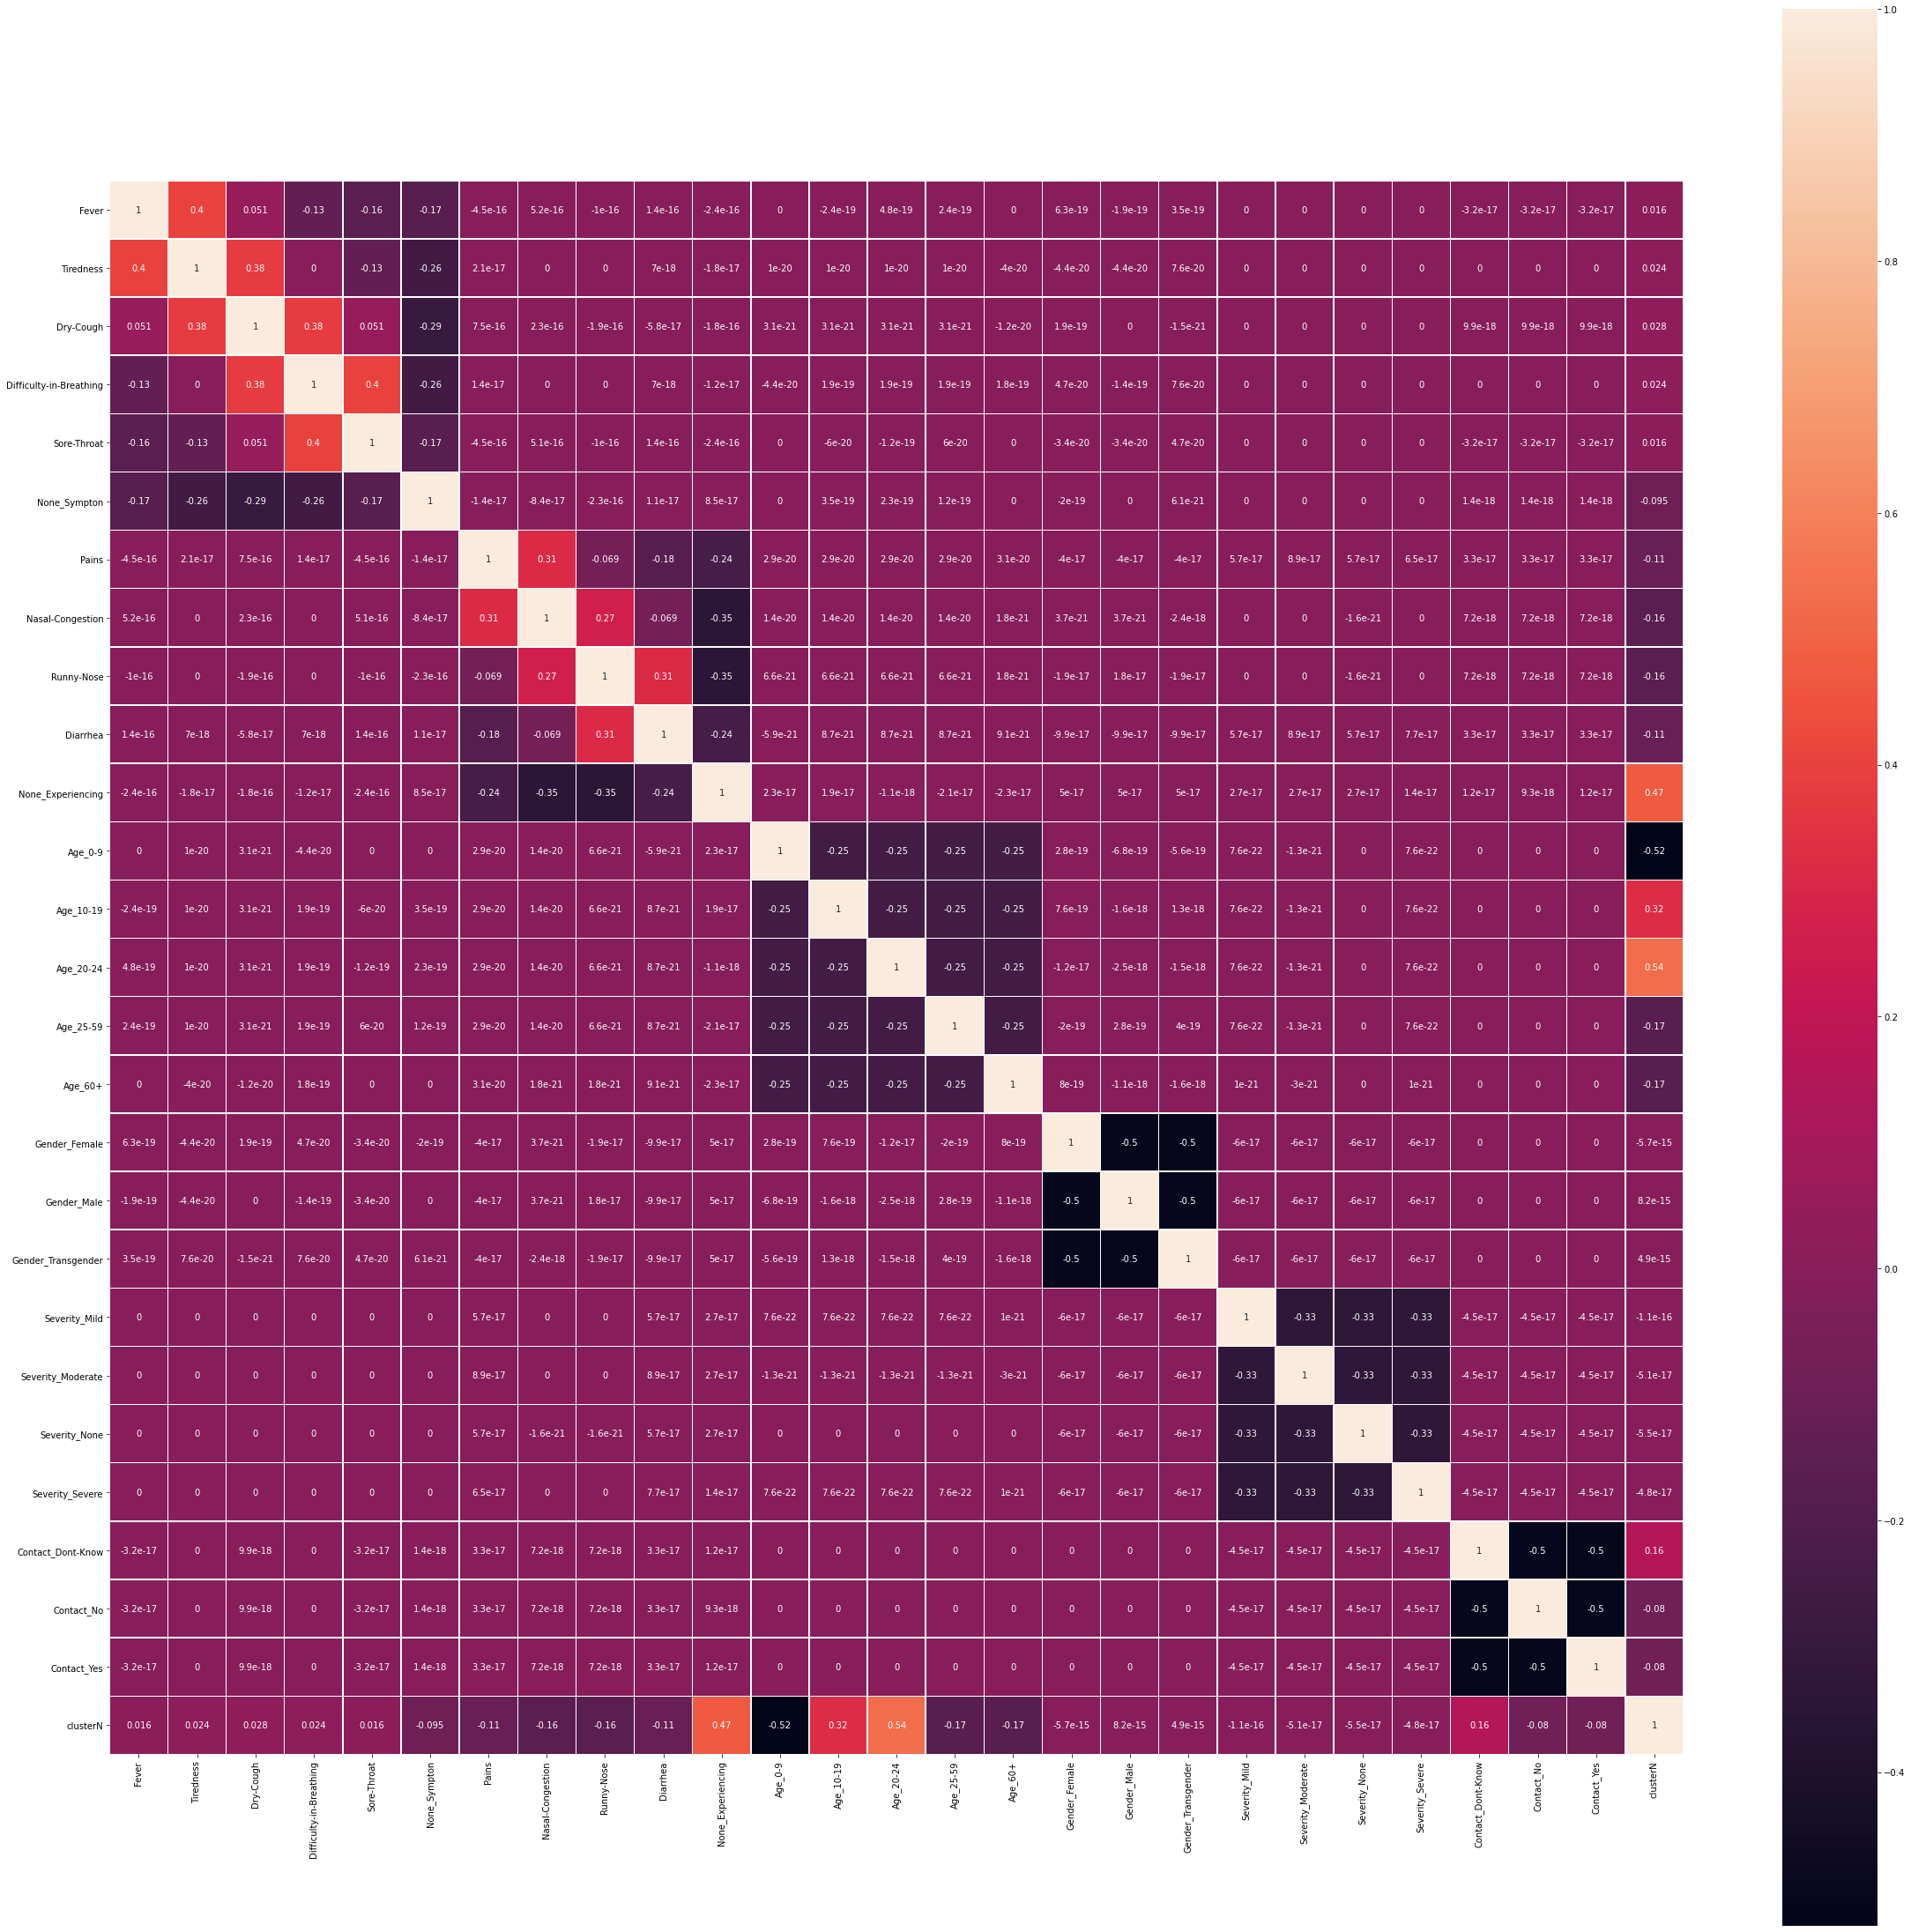

In [19]:
#lets get the corrlation heatmap
import seaborn as sns

corrmat = df.corr()

plt.figure(figsize =(40,40))
sns.heatmap(corrmat,square=True,annot=True,linewidth=.5)
plt.show()

#### Let's try to apply the k-means clustering algorithm on categorical data to see what we can get.

## KMeans

In [6]:
# Standarizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(df)

####  Lets plot elbow curve to determine how many number clusters will fix most

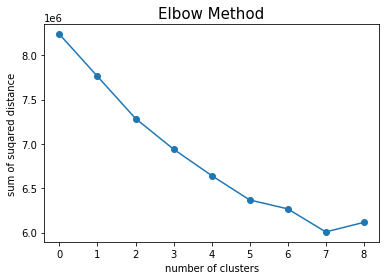

In [9]:
a = []
K = range(1,10)
for i in K:
    kmean=KMeans(n_clusters=i)
    kmean.fit(X_std)
    a.append(kmean.inertia_)

plt.plot(a,marker='o')
plt.title('Elbow Method',fontsize=15)
plt.xlabel('number of clusters')
plt.ylabel('sum of suqared distance')
plt.show()

lets increase our K range

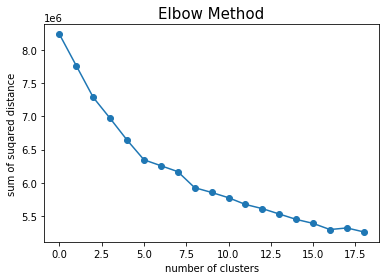

In [37]:
a = []
K = range(1,20)
for i in K:
    kmean=KMeans(n_clusters=i)
    kmean.fit(X_std)
    a.append(kmean.inertia_)

plt.plot(a,marker='o')
plt.title('Elbow Method',fontsize=15)
plt.xlabel('number of clusters')
plt.ylabel('sum of suqared distance')
plt.show()

As the elbow method result shows above, 7 clusters will be choosed. 

In [8]:
k_means = KMeans(n_clusters=7,random_state=123)

y_pred= k_means.fit_predict(X_std)

In [9]:
from sklearn import datasets, metrics
print("The silhoutte score of the Kmeans solution: {}"
      .format(metrics.silhouette_score(X_std, y_pred, metric='euclidean')))

The silhoutte score of the Kmeans solution: 0.0997763266359544


### Gaussian Mixture

In [7]:
# Defining the agglomerative clustering
gmm_cluster = GaussianMixture(n_components=3, random_state=123)

# Fit model
clusters = gmm_cluster.fit_predict(X_std)

In [9]:
from sklearn import datasets, metrics
print("The silhoutte score of the GMM solution: {}"
      .format(metrics.silhouette_score(X_std, clusters, metric='euclidean')))

The silhoutte score of the GMM solution: 0.06524354593692958


According to the silhouette score, the Kmeans algorithm performs better. The main reason for the score is still not high because the data is either 1 or 0, which decreases the similarity of each data point. So we will choose Kmeans instead of Gaussian Mixture.

Let's use K-means's cluster to label our dataset and see how it performed. 

### Label

In [6]:
pd.Series(k_means.labels_).value_counts()

1    72000
5    54000
4    54000
0    54000
3    36000
6    27000
2    19800
dtype: int64

In [7]:
n_cluster=k_means.labels_
df['clusterN'] = n_cluster
df.head()

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,clusterN
0,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,0,1,0
1,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,1,0,0
2,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,1,0,0,0
3,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,0,1,0
4,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,1,0,0


### Let's use dimentionality reduction technique to have better visualization

## PCA

In [14]:
pca = PCA(n_components=3)

pca_components = pca.fit_transform(X_std)

In [15]:
pca_components = pd.DataFrame(pca_components,columns=['pca1','pca2','pca3'])
pca_components.head()

,pca1,pca2,pca3
0,-2.115928,-1.566627,0.035938
1,-2.075736,-1.675970,-0.209060
2,-2.170497,-1.714686,0.469198
3,-2.077689,-1.616241,-0.122793
4,-2.037497,-1.725583,-0.367791


In [16]:
pca_components = pd.concat([pca_components,pd.DataFrame({'clusterN':n_cluster})],axis=1)
pca_components.head()

,pca1,pca2,pca3,clusterN
0,-2.115928,-1.566627,0.035938,0
1,-2.075736,-1.675970,-0.209060,0
2,-2.170497,-1.714686,0.469198,0
3,-2.077689,-1.616241,-0.122793,0
4,-2.037497,-1.725583,-0.367791,0


In [17]:
#to check if our cluster has correctly labeled
pca_components['clusterN'].unique()

array([0, 6, 2, 4, 5, 1, 3], dtype=int32)

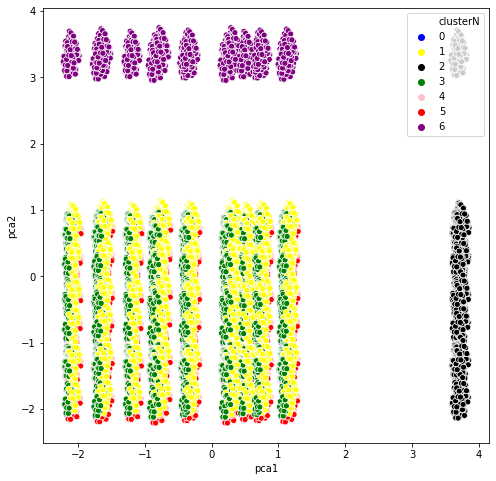

In [20]:
# lets have our cluster show on 2d=plot
plt.figure(figsize=(8,8))
ax = sns.scatterplot(x=pca_components['pca1'],y=pca_components['pca2'],hue='clusterN',data=pca_components,
                    palette=['blue','yellow','black','green','pink','red','purple'])
plt.show()

#### We can clearly identify cluster 6 and cluster 2 and some of the cluster hidden under cluster 1 and cluster 3. We try to plot it into 3D and find where those are.

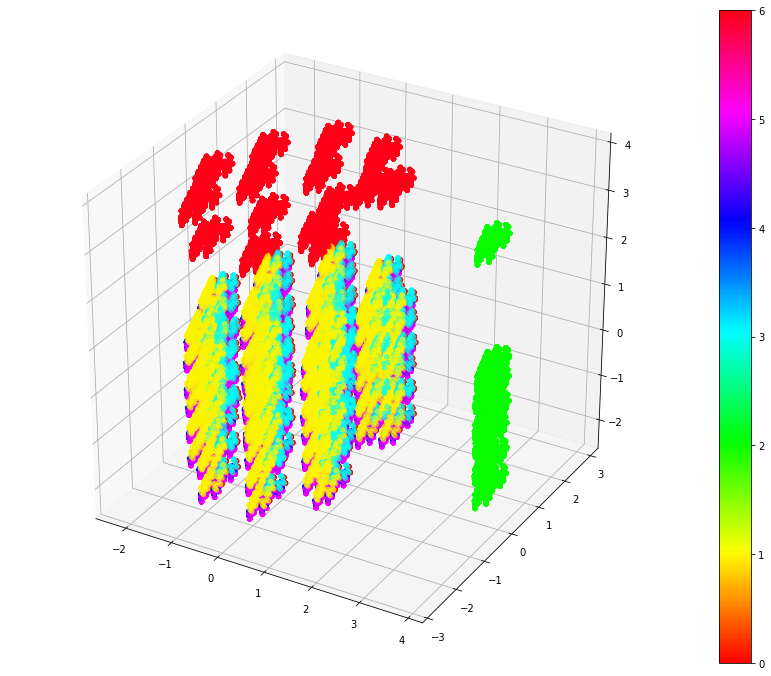

In [21]:
#plot into the 3d-plot
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15,12))
ax = fig.add_subplot(111,projection='3d')
sc=ax.scatter(xs=pca_components['pca1'],ys=pca_components['pca3'],zs=pca_components['pca2'],
             c=pca_components['clusterN'],marker='o',cmap='hsv')
plt.colorbar(sc)
plt.show()

We had better view for our cluster. Next lets check Umap technique to see if it will performs better.

## UMAP

In [32]:
import time

time_start = time.time()

umap_results = umap.UMAP(n_neighbors=5,
                      min_dist=0.3,
                      metric='correlation').fit_transform(X_std)

print('UMAP done! Time elapsed: {} seconds'.format(time.time()-time_start))

/opt/anaconda3/lib/python3.8/site-packages/umap/spectral.py:255: UserWarning: WARNING: spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/opt/anaconda3/lib/python3.8/site-packages/umap/spectral.py:255: UserWarning: WARNING: spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/opt/anaconda3/lib/python3.8/site-packages/umap/spectral.py:255: UserWarning: WARNING: spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/opt/anaconda3/lib/python3.8/site-packages/umap/spectral.py:255: UserWarning: WARNING: spectral initialisation failed!

UMAP done! Time elapsed: 1150.2436010837555 seconds


In [38]:
umap_results = pd.DataFrame(umap_results,columns=['set1','set2'])
umap_results.head()

,set1,set2
0,5.037858,4.045365
1,-4.113586,9.499943
2,3.943852,15.023252
3,-0.176755,10.690714
4,12.677427,-0.661718


In [39]:
umap_results = pd.concat([umap_results,pd.DataFrame({'clusterN':n_cluster})],axis=1)
umap_results.head()

,set1,set2,clusterN
0,5.037858,4.045365,0
1,-4.113586,9.499943,0
2,3.943852,15.023252,0
3,-0.176755,10.690714,0
4,12.677427,-0.661718,0


/opt/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


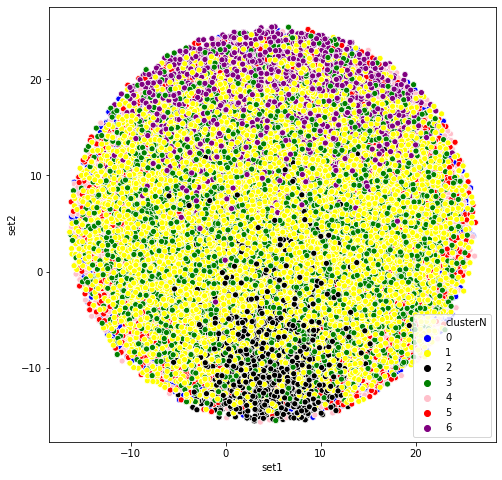

In [40]:
# lets have our cluster show on 2d=plot
plt.figure(figsize=(8,8))
ax = sns.scatterplot(x=umap_results['set1'],y=umap_results['set2'],hue='clusterN',data=umap_results,
                    palette=['blue','yellow','black','green','pink','red','purple'])
plt.show()

We can see cluster 6 is on top of the circle, and cluster 2 is on the bottom of the circle, but the clusters are not clearly separated from each other.

### Understand Cluster

In [8]:
cluster_2 = df[df['clusterN']==2]

In [9]:
cluster_2.head()

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,clusterN
1980,0,0,0,0,0,1,1,1,1,1,...,1,0,1,0,0,0,0,0,1,2
1981,0,0,0,0,0,1,1,1,1,1,...,1,0,1,0,0,0,0,1,0,2
1982,0,0,0,0,0,1,1,1,1,1,...,1,0,1,0,0,0,1,0,0,2
1983,0,0,0,0,0,1,1,1,1,1,...,1,0,0,1,0,0,0,0,1,2
1984,0,0,0,0,0,1,1,1,1,1,...,1,0,0,1,0,0,0,1,0,2


In [34]:
cluster_2.describe()

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,None_Experiencing,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Age_60+,Gender_Female,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,clusterN
count,19800.0,19800.0,19800.0,19800.0,19800.0,19800.0,19800.000000,19800.000000,19800.000000,19800.000000,19800.000000,19800.00000,19800.00000,19800.00000,19800.00000,19800.00000,19800.000000,19800.000000,19800.000000,19800.000000,19800.000000,19800.000000,19800.000000,19800.000000,19800.000000,19800.000000,19800.0
mean,0.0,0.0,0.0,0.0,0.0,1.0,0.363636,0.545455,0.545455,0.363636,0.090909,0.20000,0.20000,0.20000,0.20000,0.20000,0.333333,0.333333,0.333333,0.250000,0.250000,0.250000,0.250000,0.333333,0.333333,0.333333,2.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.481058,0.497942,0.497942,0.481058,0.287487,0.40001,0.40001,0.40001,0.40001,0.40001,0.471416,0.471416,0.471416,0.433024,0.433024,0.433024,0.433024,0.471416,0.471416,0.471416,0.0
min,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.0
25%,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.0
50%,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.0
75%,0.0,0.0,0.0,0.0,0.0,1.0,1.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,1.000000,1.000000,1.000000,0.250000,0.250000,0.250000,0.250000,1.000000,1.000000,1.000000,2.0
max,0.0,0.0,0.0,0.0,0.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.00000,1.00000,1.00000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.0


In [11]:
cluster_6=df[df['clusterN']==6]

In [35]:
cluster_6.describe()

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,None_Experiencing,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Age_60+,Gender_Female,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,clusterN
count,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.0,27000.0,27000.0,27000.0,27000.0,27000.0,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.0
mean,0.333333,0.533333,0.600000,0.533333,0.333333,0.0,0.0,0.0,0.0,0.0,1.0,0.200000,0.200000,0.200000,0.200000,0.200000,0.333333,0.333333,0.333333,0.250000,0.250000,0.250000,0.250000,0.333333,0.333333,0.333333,6.0
std,0.471413,0.498897,0.489907,0.498897,0.471413,0.0,0.0,0.0,0.0,0.0,0.0,0.400007,0.400007,0.400007,0.400007,0.400007,0.471413,0.471413,0.471413,0.433021,0.433021,0.433021,0.433021,0.471413,0.471413,0.471413,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.0
50%,0.000000,1.000000,1.000000,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.0
75%,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.250000,0.250000,0.250000,0.250000,1.000000,1.000000,1.000000,6.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.0


In [29]:
pd.set_option('max_columns',None)
cluster_5=df[df['clusterN']==5]
cluster_5.describe()

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,None_Experiencing,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Age_60+,Gender_Female,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,clusterN
count,54000.000000,54000.000000,54000.000000,54000.000000,54000.000000,54000.0,54000.000000,54000.000000,54000.000000,54000.000000,54000.0,54000.0,54000.0,54000.0,54000.0,54000.0,54000.000000,54000.000000,54000.000000,54000.000000,54000.000000,54000.000000,54000.000000,54000.000000,54000.000000,54000.000000,54000.0
mean,0.333333,0.533333,0.600000,0.533333,0.333333,0.0,0.400000,0.600000,0.600000,0.400000,0.0,0.0,0.0,1.0,0.0,0.0,0.333333,0.333333,0.333333,0.250000,0.250000,0.250000,0.250000,0.333333,0.333333,0.333333,5.0
std,0.471409,0.498892,0.489902,0.498892,0.471409,0.0,0.489902,0.489902,0.489902,0.489902,0.0,0.0,0.0,0.0,0.0,0.0,0.471409,0.471409,0.471409,0.433017,0.433017,0.433017,0.433017,0.471409,0.471409,0.471409,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.0
50%,0.000000,1.000000,1.000000,1.000000,0.000000,0.0,0.000000,1.000000,1.000000,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.0
75%,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,1.0,0.0,0.0,1.000000,1.000000,1.000000,0.250000,0.250000,0.250000,0.250000,1.000000,1.000000,1.000000,5.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,1.0,0.0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.0


In [32]:
cluster_1=df[df['clusterN']==1]
cluster_1.describe()

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,None_Experiencing,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Age_60+,Gender_Female,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,clusterN
count,72000.000000,72000.000000,72000.000000,72000.000000,72000.000000,72000.0,72000.000000,72000.000000,72000.000000,72000.000000,72000.0,72000.0,72000.0,72000.0,72000.000000,72000.000000,72000.000000,72000.000000,72000.000000,72000.000000,72000.000000,72000.000000,72000.000000,72000.0,72000.000000,72000.000000,72000.0
mean,0.333333,0.533333,0.600000,0.533333,0.333333,0.0,0.400000,0.600000,0.600000,0.400000,0.0,0.0,0.0,0.0,0.500000,0.500000,0.333333,0.333333,0.333333,0.250000,0.250000,0.250000,0.250000,0.0,0.500000,0.500000,1.0
std,0.471408,0.498891,0.489901,0.498891,0.471408,0.0,0.489901,0.489901,0.489901,0.489901,0.0,0.0,0.0,0.0,0.500003,0.500003,0.471408,0.471408,0.471408,0.433016,0.433016,0.433016,0.433016,0.0,0.500003,0.500003,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.0
50%,0.000000,1.000000,1.000000,1.000000,0.000000,0.0,0.000000,1.000000,1.000000,0.000000,0.0,0.0,0.0,0.0,0.500000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.500000,0.500000,1.0
75%,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.250000,0.250000,0.250000,0.250000,0.0,1.000000,1.000000,1.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.0


In [33]:
cluster_3=df[df['clusterN']==3]
cluster_3.describe()

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,None_Experiencing,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Age_60+,Gender_Female,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,clusterN
count,36000.000000,36000.000000,36000.000000,36000.000000,36000.000000,36000.0,36000.000000,36000.000000,36000.000000,36000.000000,36000.0,36000.0,36000.0,36000.0,36000.000000,36000.000000,36000.000000,36000.000000,36000.000000,36000.000000,36000.000000,36000.000000,36000.000000,36000.0,36000.0,36000.0,36000.0
mean,0.333333,0.533333,0.600000,0.533333,0.333333,0.0,0.400000,0.600000,0.600000,0.400000,0.0,0.0,0.0,0.0,0.500000,0.500000,0.333333,0.333333,0.333333,0.250000,0.250000,0.250000,0.250000,1.0,0.0,0.0,3.0
std,0.471411,0.498895,0.489905,0.498895,0.471411,0.0,0.489905,0.489905,0.489905,0.489905,0.0,0.0,0.0,0.0,0.500007,0.500007,0.471411,0.471411,0.471411,0.433019,0.433019,0.433019,0.433019,0.0,0.0,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0,3.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0,3.0
50%,0.000000,1.000000,1.000000,1.000000,0.000000,0.0,0.000000,1.000000,1.000000,0.000000,0.0,0.0,0.0,0.0,0.500000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0,3.0
75%,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.250000,0.250000,0.250000,0.250000,1.0,0.0,0.0,3.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,0.0,0.0,3.0


In [30]:
cluster_4=df[df['clusterN']==4]
cluster_4.describe()

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,None_Experiencing,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Age_60+,Gender_Female,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,clusterN
count,54000.000000,54000.000000,54000.000000,54000.000000,54000.000000,54000.0,54000.000000,54000.000000,54000.000000,54000.000000,54000.0,54000.0,54000.0,54000.0,54000.0,54000.0,54000.000000,54000.000000,54000.000000,54000.000000,54000.000000,54000.000000,54000.000000,54000.000000,54000.000000,54000.000000,54000.0
mean,0.333333,0.533333,0.600000,0.533333,0.333333,0.0,0.400000,0.600000,0.600000,0.400000,0.0,0.0,1.0,0.0,0.0,0.0,0.333333,0.333333,0.333333,0.250000,0.250000,0.250000,0.250000,0.333333,0.333333,0.333333,4.0
std,0.471409,0.498892,0.489902,0.498892,0.471409,0.0,0.489902,0.489902,0.489902,0.489902,0.0,0.0,0.0,0.0,0.0,0.0,0.471409,0.471409,0.471409,0.433017,0.433017,0.433017,0.433017,0.471409,0.471409,0.471409,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.0
50%,0.000000,1.000000,1.000000,1.000000,0.000000,0.0,0.000000,1.000000,1.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.0
75%,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,0.0,0.0,1.0,0.0,0.0,0.0,1.000000,1.000000,1.000000,0.250000,0.250000,0.250000,0.250000,1.000000,1.000000,1.000000,4.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,0.0,0.0,1.0,0.0,0.0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.0


#### Discussion 

Recall the result from the PCA 3D graph: the **green cluster (2)** and **red cluster (6)** separates from each other clearly, so let's look at the difference between these two clusters. 

Compare to the description of **cluster 2 and 6**, we can see the most different part is cluster 2 doesn't have symptoms that most patients who affected COVID-19 had, like 'dry cough' and 'difficulty in breathing,' and most of the data point of cluster 6 have those symptoms. Cluster 6 also has no flu symptoms, like 'Nasal-Congestion' and 'Runny-Nose,' which most of the data points of the cluster have. We can confirm that cluster 2 is not affected by COVID-19, and cluster 6 is affected by COVID-19. 

On the PCA 2D and 3D graph, we can see the rest of the clusters were stand closely. Let's check the description of them.

**Cluster 5** and **cluster 1** have similar rate of different symptoms occurs, but cluster 5 are mostly in Age_20-24 and cluster 1 are mostly in Age_25-59 and Age_60+.

**Cluster 3** and **cluster 1** are in the same age range, but the different is cluster 3 mostly not sure if they contacted with confirmed patient or not, and cluster 1 is sure about it.

**Cluster 4** has similar rate of different symptoms occurs as cluster 5 and 1, but cluster 4 is in Age_10-19 range.

#### Conclusion

In conclusion, the main difference of **cluster 2 & 6** with **cluster 1,3,4&5** is cluster 2 & 6 has an obvious sign of being affected by covid or not, and cluster 1,3,4&5 are not.

#### Recommendation 

There are different covid-19 tests with a different correct rate; for example, some of the rapid tests have only a 30% correct rate, but the result comes up in 15 mins. Therefore, the model could be used for medical advice by finding out the patients'  level of the effect from COVID-19 before doctors send them to do the test. It could also be used on phone appointments with patients or even check-in before seeing the doctor for different diseases to increase the efficiency of the diagnosis.

#### Weak point & Improvement 

Speaking of the Weak point, I believe it is my laptop is unable to support this dataset to run different clustering algorithms and turn the parameter since the dataset is too large. And I think it will also be an improvement for me to try different algorithms in the future on other equipment.